CT4103 Assessment - Rock Paper Scissors

##Setting up kaggle with colab

Using the kaggle api key from the kaggle account settings. Kaggle key must be saved as kaggle.json not kaggle(1).json or kaggle(2).json

In [14]:
from google.colab import files
files.upload()

{}

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [4]:
!kaggle datasets download -d sanikamal/rock-paper-scissors-dataset

 98% 444M/452M [00:04<00:00, 136MB/s]
100% 452M/452M [00:04<00:00, 103MB/s]


In [5]:
!unzip -q rock-paper-scissors-dataset.zip -d .

In [10]:
import numpy as np
import pandas as pd
from fastai.vision import *
from fastai.metrics import error_rate,accuracy
from fastai.vision.image import open_image
import os

In [ ]:
imgsize = 224
batchsize = 64
np.random.seed(42)

In [ ]:
path_images= "Rock-Paper-Scissors/train"

In [ ]:
labels = os.listdir(path_images)
print("No. of labels: %s" % (len(labels)))
print("----------------------------")

#Goes through each file. Adds /label to add current label in labels loop. This returns the number of images in the file
for label in labels:
    print("%s, %s files" % (label, len(os.listdir(path_images+'/' +label))))

No. of labels: 3
----------------------------
rock, 840 files
scissors, 840 files
paper, 840 files


In [ ]:
import warnings
warnings.filterwarnings('ignore')

##Creating CNN

First CNN will use resnet34 and an image size of 224 to set a baseline

In [ ]:
data = ImageDataBunch.from_folder(path_images, ds_tfms=get_transforms(), valid_pct=0.2, size=imgsize, bs=batchsize).normalize(imagenet_stats)

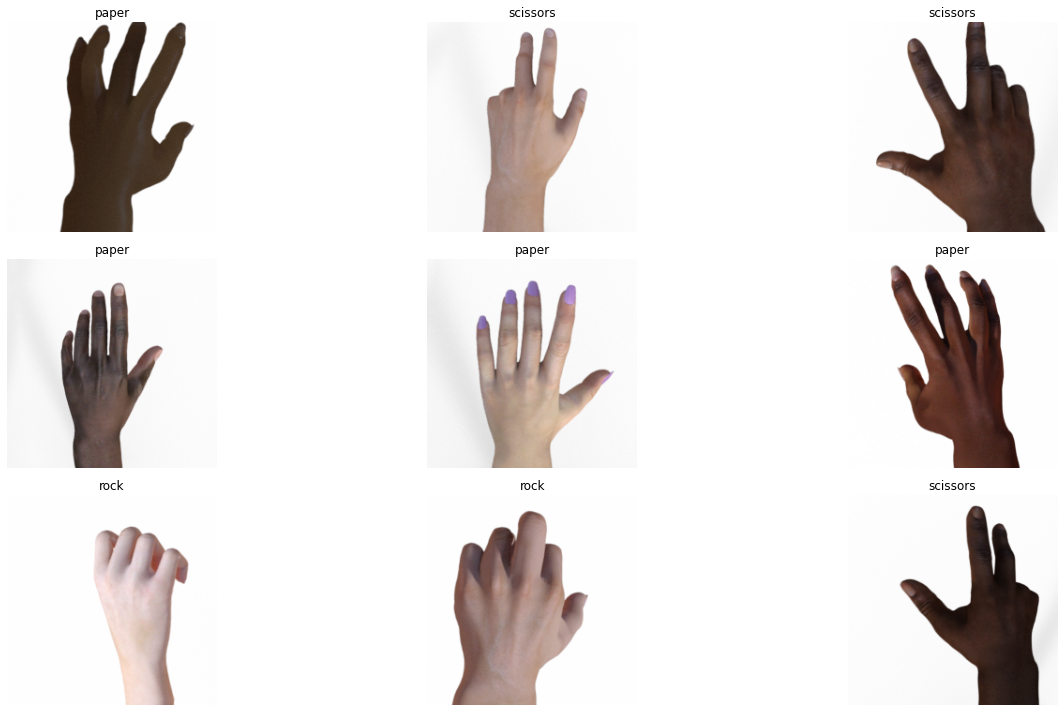

In [ ]:
data.show_batch(rows=3, figsize=(20,10))

In [ ]:
learner = cnn_learner(data, models.resnet34, metrics=[accuracy,error_rate], callback_fns=ShowGraph, model_dir="/tmp/model/")

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

In [ ]:
learner.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.495965,0.016076,0.996032,0.003968,00:27
1,0.209910,0.001887,1.000000,0.000000,00:26
2,0.112490,0.000812,1.000000,0.000000,00:26
3,0.071949,0.000937,1.000000,0.000000,00:25


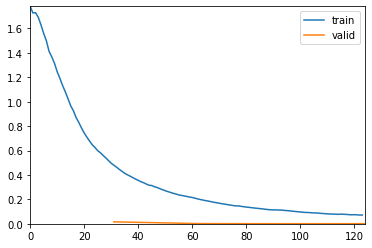

In [ ]:
learner.fit_one_cycle(4)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


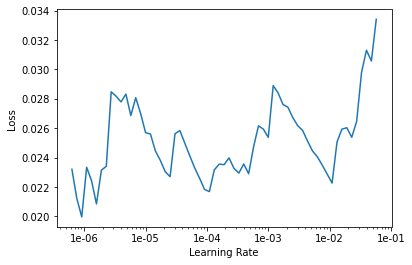

In [ ]:
learner.lr_find()
learner.recorder.plot()

Different machines result in a varying learning rate so 1e-2 was similar between both.

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.610162,8.016323,0.585317,0.414683,00:27
1,0.234975,0.002971,1.000000,0.000000,00:27


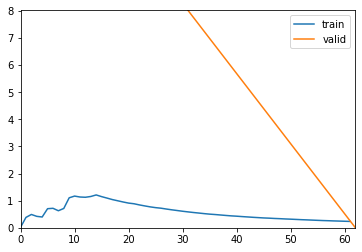

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(2, max_lr=slice(1e-2, 1e-2))

Valid line began to act strangely when using specific learning rate slices

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.120216,13.828657,0.486111,0.513889,00:27
1,0.060813,0.000530,1.000000,0.000000,00:30


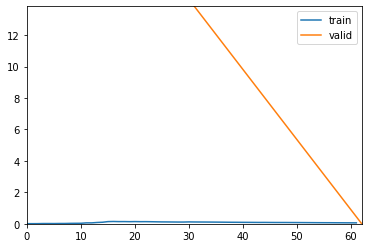

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(2, max_lr=slice(1e-3, 1e-2))

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.056176,11.277117,0.736111,0.263889,00:27
1,0.074985,31.019602,0.769841,0.230159,00:27
2,0.097029,0.005361,0.998016,0.001984,00:28
3,0.062080,0.000774,1.000000,0.000000,00:28


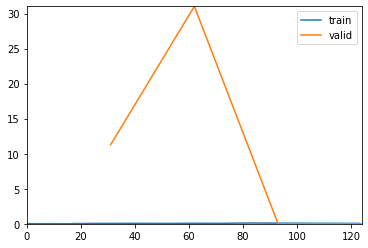

In [ ]:
learner.unfreeze()
learner.fit_one_cycle(4, max_lr=slice(1e-3, 1e-2))

Valid line flattened close to the train line between 80 and 100. I will attempt to use the model to predict values

In [ ]:
for paper in range(1, 10):
  img = open_image('Rock-Paper-Scissors/validation/paper'+ str(paper) +'.png')
  prediction = learner.predict(img)
  print("prediction for paper" + str(paper) + " is:")
  print(prediction)


prediction for paper1 is:
(Category tensor(2), tensor(2), tensor([0.0262, 0.2711, 0.7027]))
prediction for paper2 is:
(Category tensor(0), tensor(0), tensor([9.9993e-01, 5.2144e-05, 1.3470e-05]))
prediction for paper3 is:
(Category tensor(0), tensor(0), tensor([9.9896e-01, 1.6943e-04, 8.7555e-04]))
prediction for paper4 is:
(Category tensor(0), tensor(0), tensor([9.9995e-01, 8.8669e-06, 3.9327e-05]))
prediction for paper5 is:
(Category tensor(2), tensor(2), tensor([4.4338e-02, 1.8477e-05, 9.5564e-01]))
prediction for paper6 is:
(Category tensor(0), tensor(0), tensor([9.9997e-01, 1.4782e-05, 1.2725e-05]))
prediction for paper7 is:
(Category tensor(0), tensor(0), tensor([1.0000e+00, 3.4427e-06, 2.6175e-07]))
prediction for paper8 is:
(Category tensor(0), tensor(0), tensor([9.9999e-01, 9.3411e-06, 2.6310e-07]))
prediction for paper9 is:
(Category tensor(0), tensor(0), tensor([9.4129e-01, 7.9045e-05, 5.8628e-02]))


In [ ]:
for rock in range(1, 10):
  img = open_image('Rock-Paper-Scissors/validation/rock'+ str(rock) +'.png')
  prediction = learner.predict(img)
  print("prediction for rock" + str(rock) + " is:")
  print(prediction)

prediction for rock1 is:
(Category tensor(1), tensor(1), tensor([3.0971e-05, 9.9997e-01, 1.3467e-06]))
prediction for rock2 is:
(Category tensor(1), tensor(1), tensor([2.3174e-04, 9.9974e-01, 2.4414e-05]))
prediction for rock3 is:
(Category tensor(1), tensor(1), tensor([4.5500e-10, 1.0000e+00, 2.6047e-10]))
prediction for rock4 is:
(Category tensor(1), tensor(1), tensor([1.2277e-05, 9.9999e-01, 1.8637e-07]))
prediction for rock5 is:
(Category tensor(1), tensor(1), tensor([0.0021, 0.9850, 0.0129]))
prediction for rock6 is:
(Category tensor(1), tensor(1), tensor([4.6783e-05, 9.9995e-01, 9.4551e-07]))
prediction for rock7 is:
(Category tensor(1), tensor(1), tensor([0.0787, 0.8757, 0.0455]))
prediction for rock8 is:
(Category tensor(1), tensor(1), tensor([8.2322e-07, 1.0000e+00, 1.1734e-08]))
prediction for rock9 is:
(Category tensor(1), tensor(1), tensor([0.0021, 0.9888, 0.0091]))


In [ ]:
for scissors in range(1, 10):
  img = open_image('Rock-Paper-Scissors/validation/rock'+ str(scissors) +'.png')
  prediction = learner.predict(img)
  print("prediction for scissors" + str(scissors) + " is:")
  print(prediction)

prediction for scissors1 is:
(Category tensor(1), tensor(1), tensor([3.0971e-05, 9.9997e-01, 1.3467e-06]))
prediction for scissors2 is:
(Category tensor(1), tensor(1), tensor([2.3174e-04, 9.9974e-01, 2.4414e-05]))
prediction for scissors3 is:
(Category tensor(1), tensor(1), tensor([4.5500e-10, 1.0000e+00, 2.6047e-10]))
prediction for scissors4 is:
(Category tensor(1), tensor(1), tensor([1.2277e-05, 9.9999e-01, 1.8637e-07]))
prediction for scissors5 is:
(Category tensor(1), tensor(1), tensor([0.0021, 0.9850, 0.0129]))
prediction for scissors6 is:
(Category tensor(1), tensor(1), tensor([4.6783e-05, 9.9995e-01, 9.4551e-07]))
prediction for scissors7 is:
(Category tensor(1), tensor(1), tensor([0.0787, 0.8757, 0.0455]))
prediction for scissors8 is:
(Category tensor(1), tensor(1), tensor([8.2322e-07, 1.0000e+00, 1.1734e-08]))
prediction for scissors9 is:
(Category tensor(1), tensor(1), tensor([0.0021, 0.9888, 0.0091]))


Learner thinks scissors is the same as rock and some paper are considered scissors


I will try freezing and runing 4 epochs again to see what has happened to the model

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.019946,0.000348,1.000000,0.000000,00:26
1,0.014210,0.000059,1.000000,0.000000,00:25
2,0.013584,0.000030,1.000000,0.000000,00:25
3,0.011076,0.000027,1.000000,0.000000,00:26


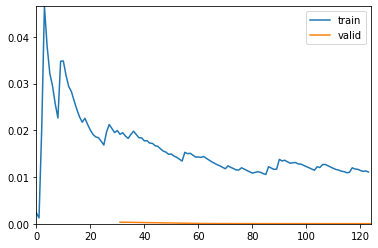

In [ ]:
learner.freeze()
learner.fit_one_cycle(4)

Will attempt to increase image size to give the model more data. Batch size has been reduced to 32 from 64


In [ ]:
data_larger = ImageDataBunch.from_folder(path_images, ds_tfms=get_transforms(), valid_pct=0.2, size=300, bs=32).normalize(imagenet_stats)

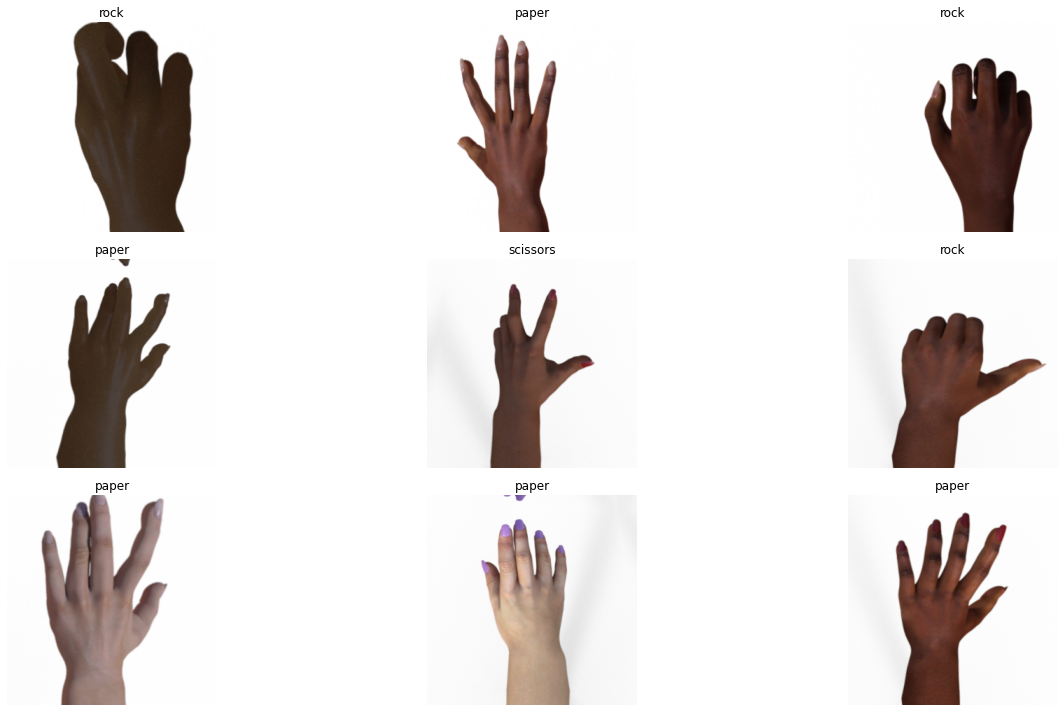

In [ ]:
data_larger.show_batch(rows=3, figsize=(20,10))

In [ ]:
#Setting image size to 300 seems to include the entire image where as 224 cut some off
learner2 = cnn_learner(data_larger, models.resnet34, metrics=[accuracy,error_rate], callback_fns=ShowGraph, model_dir="/tmp/model/")

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.371332,0.009430,0.998016,0.001984,00:40
1,0.136316,0.001243,1.000000,0.000000,00:39
2,0.062181,0.000999,1.000000,0.000000,00:38
3,0.034973,0.000418,1.000000,0.000000,00:38


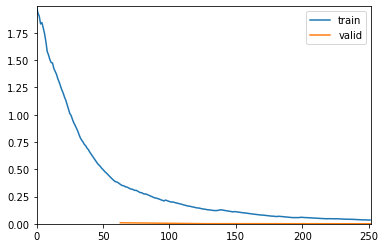

In [ ]:
learner2.fit_one_cycle(4)

In [ ]:
from fastai.vision.image import open_image
for paper in range(1, 10):
  img = open_image('Rock-Paper-Scissors/validation/paper'+ str(paper) +'.png')
  prediction = learner2.predict(img)
  print("prediction for paper" + str(paper) + " is:")
  print(prediction)

prediction for paper1 is:
(Category tensor(1), tensor(1), tensor([0.1529, 0.5304, 0.3167]))
prediction for paper2 is:
(Category tensor(0), tensor(0), tensor([9.9976e-01, 9.5931e-07, 2.4191e-04]))
prediction for paper3 is:
(Category tensor(0), tensor(0), tensor([0.9427, 0.0406, 0.0167]))
prediction for paper4 is:
(Category tensor(0), tensor(0), tensor([9.9955e-01, 4.3926e-04, 1.4126e-05]))
prediction for paper5 is:
(Category tensor(0), tensor(0), tensor([9.9999e-01, 9.3774e-06, 4.5376e-07]))
prediction for paper6 is:
(Category tensor(0), tensor(0), tensor([9.9938e-01, 5.0703e-04, 1.1428e-04]))
prediction for paper7 is:
(Category tensor(0), tensor(0), tensor([0.6354, 0.0008, 0.3638]))
prediction for paper8 is:
(Category tensor(0), tensor(0), tensor([9.9835e-01, 6.2599e-05, 1.5919e-03]))
prediction for paper9 is:
(Category tensor(0), tensor(0), tensor([9.9237e-01, 7.5964e-03, 3.7310e-05]))


In [ ]:
for scissors in range(1, 10):
  img = open_image('Rock-Paper-Scissors/validation/scissors'+ str(scissors) +'.png')
  prediction = learner2.predict(img)
  print("prediction for scissors" + str(scissors) + " is:")
  print(prediction)

prediction for scissors1 is:
(Category tensor(2), tensor(2), tensor([1.4659e-04, 1.3609e-04, 9.9972e-01]))
prediction for scissors2 is:
(Category tensor(2), tensor(2), tensor([4.2482e-05, 1.9068e-05, 9.9994e-01]))
prediction for scissors3 is:
(Category tensor(2), tensor(2), tensor([0.0399, 0.0033, 0.9569]))
prediction for scissors4 is:
(Category tensor(0), tensor(0), tensor([0.6965, 0.0119, 0.2916]))
prediction for scissors5 is:
(Category tensor(2), tensor(2), tensor([3.5953e-04, 1.4959e-05, 9.9963e-01]))
prediction for scissors6 is:
(Category tensor(2), tensor(2), tensor([0.0107, 0.0024, 0.9870]))
prediction for scissors7 is:
(Category tensor(2), tensor(2), tensor([1.6232e-04, 2.9764e-04, 9.9954e-01]))
prediction for scissors8 is:
(Category tensor(2), tensor(2), tensor([3.8116e-02, 4.4765e-06, 9.6188e-01]))
prediction for scissors9 is:
(Category tensor(2), tensor(2), tensor([5.1856e-05, 2.9379e-06, 9.9995e-01]))


In [ ]:
for rock in range(1, 10):
  img = open_image('Rock-Paper-Scissors/validation/rock'+ str(rock) +'.png')
  prediction = learner2.predict(img)
  print("prediction for rock" + str(rock) + " is:")
  print(prediction)

prediction for rock1 is:
(Category tensor(1), tensor(1), tensor([3.0965e-05, 9.9969e-01, 2.7522e-04]))
prediction for rock2 is:
(Category tensor(1), tensor(1), tensor([6.7164e-11, 1.0000e+00, 2.4577e-09]))
prediction for rock3 is:
(Category tensor(1), tensor(1), tensor([3.9512e-04, 9.9960e-01, 3.5519e-06]))
prediction for rock4 is:
(Category tensor(1), tensor(1), tensor([8.7751e-05, 9.9817e-01, 1.7392e-03]))
prediction for rock5 is:
(Category tensor(2), tensor(2), tensor([0.0263, 0.1881, 0.7856]))
prediction for rock6 is:
(Category tensor(1), tensor(1), tensor([1.2014e-04, 9.8944e-01, 1.0438e-02]))
prediction for rock7 is:
(Category tensor(1), tensor(1), tensor([3.1175e-09, 1.0000e+00, 3.1330e-06]))
prediction for rock8 is:
(Category tensor(1), tensor(1), tensor([4.0430e-09, 9.9965e-01, 3.4833e-04]))
prediction for rock9 is:
(Category tensor(1), tensor(1), tensor([1.5582e-05, 9.4729e-01, 5.2690e-02]))


Better results. Each are showing a different tensor value but some are still getting mixed up. I will add more images to the data from existing images to make it more accurate

##Image Augmentation

In [6]:
import skimage
import skimage.io
import skimage.transform
import random as rdm

In [7]:
#Function takes a numpy ndarray image to randomly rotate, set empty background space to white and return it.
def Process_Image_randrotate(image):
    #Checks if the image given is an ndarray
    if type(image) != np.ndarray:
     return print("Image was not a numpy ndarray")
    #Gives a random angle between 1 and 360 degrees
    random_angle = rdm.randrange(1, 359)
    #Preserve_range parameter is needed later when saving.
    #When preserve_range=False, it converts the image to float64 which makes the image blank when using imsave
    modified_image = skimage.transform.rotate(image=image, angle=random_angle, cval= 255, preserve_range=True)
    #returns as type uint 8 to remove lossy conversion warning
    return modified_image.astype(np.uint8)

In [12]:
#Using folder rock-paper-scissors instead of Rock-Paper-Scissors

#This takes all images in the given directory folder and gets paired with 
#the path to be passed into imread to convert it into an ndarray.
#The image then gets passed into the Process_Image_randrotate function and returned into new_image.
#new_image then gets save into the same directory with a new file name with an increasing index so it doesn't overwrite an existing image
#Function takes an estimated 8mins for all 3 directories and creates and extra 2157 Augmented images. Doubling the number of original images in each folder.
def Augment_Images(directory):
  #directory name is added to path
  path = '/content/rock-paper-scissors/Rock-Paper-Scissors/train/' + directory
  imageindex = 0
  for images in os.listdir(path):
    if images.startswith('pa') or images.startswith('ro') or images.startswith('sc'):
      imagedir = os.path.join(path, images)
      readimagedir = skimage.io.imread(imagedir)
      new_image = Process_Image_randrotate(readimagedir)
      skimage.io.imsave(os.path.join(path, 'Augmented{dir}{index}.png'.format(dir = directory, index=imageindex)), new_image)
      print('\r', end='')
      print("Saving image Augmented{dir}{index}".format(dir = directory, index = imageindex), end='')
      imageindex += 1
      continue

In [13]:
rock = "rock"
paper = "paper"
scissors = "scissors"
Augment_Images(rock)
Augment_Images(paper)
Augment_Images(scissors)

Saving image Augmentedscissors479

##CNN with Augmented images

Using the augmented images to train another model to see if they result in more accurate predictions

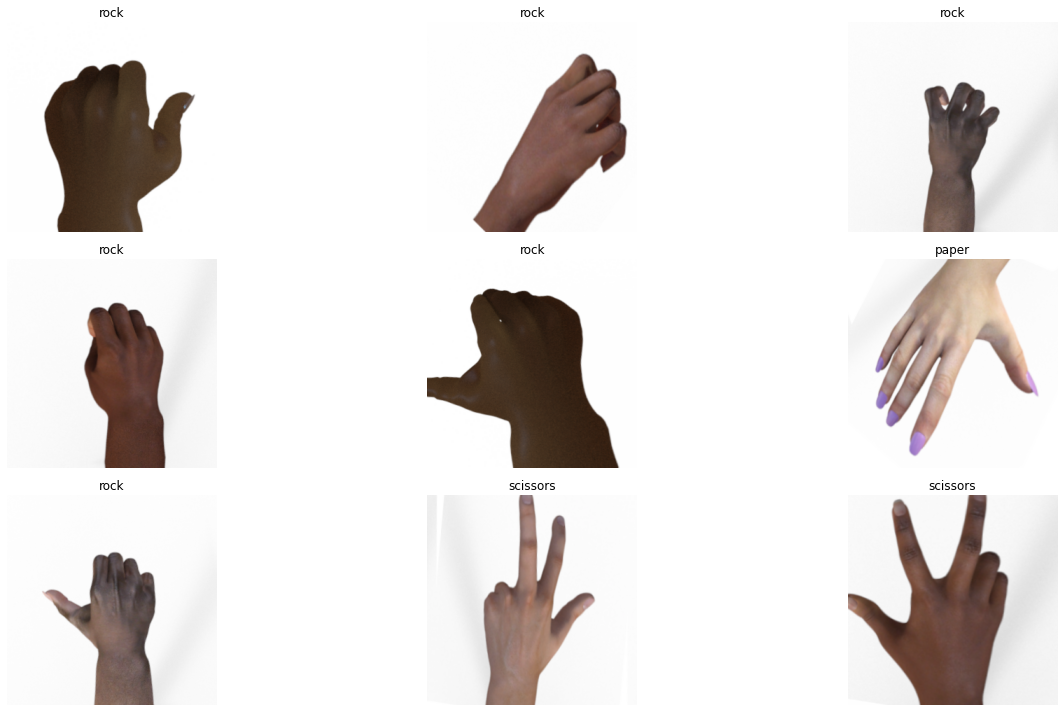

In [ ]:
Aug_path_images = '/content/rock-paper-scissors/Rock-Paper-Scissors/train'
image_size = 300
bs = 64
np.random.seed(42)
Aug_data = ImageDataBunch.from_folder(Aug_path_images, ds_tfms=get_transforms(), valid_pct=0.2, size=image_size, bs=bs).normalize(imagenet_stats)
Aug_data.show_batch(rows=3, figsize=(20,10))

In [ ]:
Aug_learner = cnn_learner(Aug_data, models.resnet34, metrics=[accuracy,error_rate], callback_fns=ShowGraph, model_dir="/tmp/model/")

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.426955,0.052691,0.974359,0.025641,01:10
1,0.195504,0.020558,0.994658,0.005342,01:07
2,0.100589,0.008976,0.997863,0.002137,01:07
3,0.062288,0.007502,0.997863,0.002137,01:08


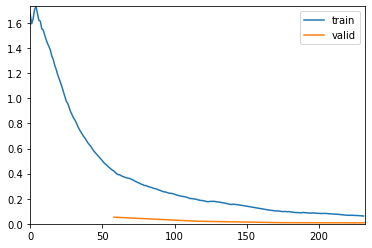

In [ ]:
Aug_learner.fit_one_cycle(4)

In [ ]:
path = '/content/rock-paper-scissors/Rock-Paper-Scissors/validation'
for validation in os.listdir(path):
  imagedir = os.path.join(path, validation)
  img = open_image(imagedir)
  prediction = Aug_learner.predict(img)
  print("prediction for " + imagedir)
  print(prediction)

prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock2.png
(Category tensor(1), tensor(1), tensor([9.3630e-10, 9.9977e-01, 2.2808e-04]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors9.png
(Category tensor(2), tensor(2), tensor([4.0951e-04, 1.2002e-08, 9.9959e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors8.png
(Category tensor(2), tensor(2), tensor([5.6679e-02, 6.9820e-09, 9.4332e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors2.png
(Category tensor(2), tensor(2), tensor([2.9876e-05, 6.3075e-06, 9.9996e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper7.png
(Category tensor(0), tensor(0), tensor([9.9928e-01, 4.3860e-06, 7.1909e-04]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors4.png
(Category tensor(1), tensor(1), tensor([0.1134, 0.7126, 0.1740]))
prediction for /c

Some images in the validation were predicted incorrectly. I will try a larger resnet for transfer learning

##Augmented CNN with larger resnet

/usr/local/lib/python3.7/dist-packages/fastai/vision/transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  ../aten/src/ATen/native/BatchLinearAlgebra.cpp:766.)
  return _solve_func(B,A)[0][:,0]
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

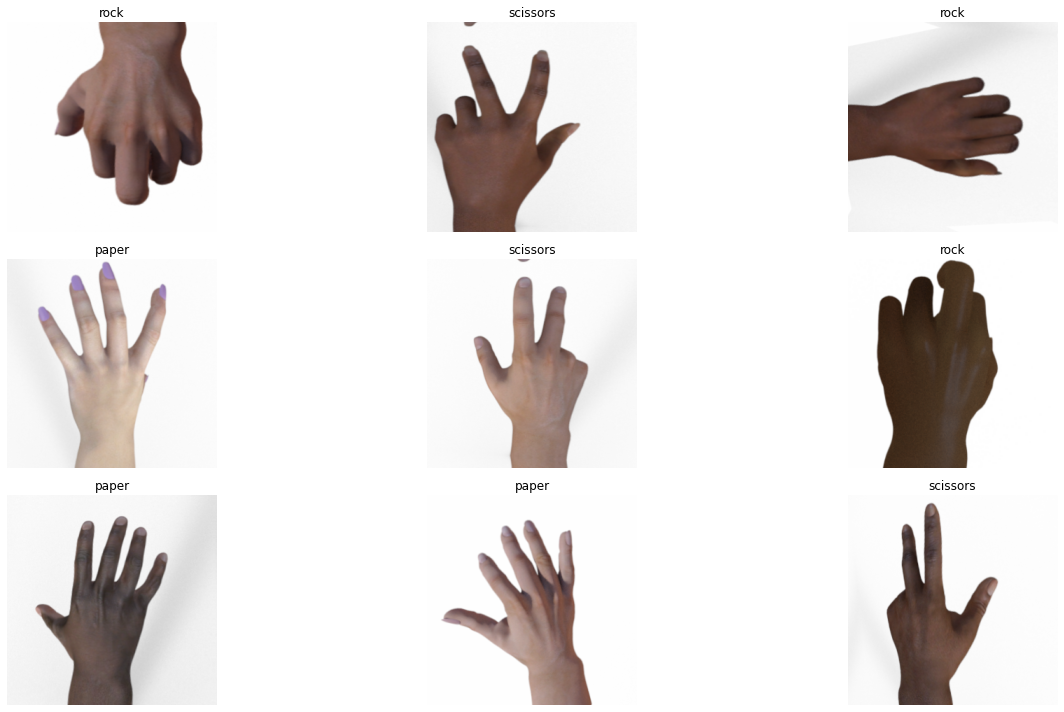

In [ ]:
Aug_path_images = '/content/rock-paper-scissors/Rock-Paper-Scissors/train'
image_size = 300
bs = 64
np.random.seed(42)
Aug_data = ImageDataBunch.from_folder(Aug_path_images, ds_tfms=get_transforms(), valid_pct=0.2, size=image_size, bs=bs).normalize(imagenet_stats)
Aug_data.show_batch(rows=3, figsize=(20,10))
Aug_learner = cnn_learner(Aug_data, models.resnet50, metrics=[accuracy,error_rate], callback_fns=ShowGraph, model_dir="/tmp/model/")

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.233811,0.030999,0.985043,0.014957,02:07
1,0.118912,0.083261,0.978632,0.021368,01:55
2,0.051386,0.016601,0.991453,0.008547,01:54
3,0.029593,0.012502,0.995726,0.004274,01:55
4,0.021509,0.014353,0.993590,0.006410,01:55


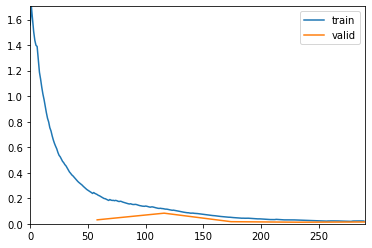

In [ ]:
Aug_learner.fit_one_cycle(5)

Valid line closely follows the train and are much closer at the end of the cycles

##Predictions

In [ ]:
path = '/content/rock-paper-scissors/Rock-Paper-Scissors/validation'
for validation in os.listdir(path):
  imagedir = os.path.join(path, validation)
  img = open_image(imagedir)
  prediction = Aug_learner.predict(img)
  print("prediction for " + imagedir)
  print(prediction)

prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock2.png
(Category tensor(1), tensor(1), tensor([5.7053e-09, 1.0000e+00, 1.3284e-06]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors9.png
(Category tensor(0), tensor(0), tensor([9.9991e-01, 3.8230e-11, 9.3586e-05]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors8.png
(Category tensor(2), tensor(2), tensor([3.7953e-03, 1.3003e-08, 9.9620e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors2.png
(Category tensor(2), tensor(2), tensor([2.7168e-08, 3.7992e-04, 9.9962e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper7.png
(Category tensor(0), tensor(0), tensor([9.9990e-01, 2.0306e-09, 9.6698e-05]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors4.png
(Category tensor(2), tensor(2), tensor([1.6668e-01, 6.4486e-06, 8.3332e-01]))
predi

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper-hires1.png
(Category tensor(0), tensor(0), tensor([1.0000e+00, 1.1685e-10, 1.8765e-07]))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors-hires2.png
(Category tensor(2), tensor(2), tensor([2.1835e-04, 7.2789e-08, 9.9978e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock7.png
(Category tensor(1), tensor(1), tensor([6.2450e-06, 9.9999e-01, 4.8533e-07]))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock-hires1.png
(Category tensor(1), tensor(1), tensor([3.6705e-04, 9.9954e-01, 8.9609e-05]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper1.png
(Category tensor(2), tensor(2), tensor([2.6596e-01, 7.9672e-05, 7.3396e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors7.png
(Category tensor(2), tensor(2), tensor([3.8803e-02, 3.3018e-09, 9.6120e-01]))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors-hires1.png
(Category tensor(2), tensor(2), tensor([8.0238e-03, 1.3663e-06, 9.9197e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper2.png
(Category tensor(0), tensor(0), tensor([1.0000e+00, 3.0789e-10, 1.0307e-07]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper6.png
(Category tensor(0), tensor(0), tensor([9.9999e-01, 1.0525e-09, 8.8346e-06]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock1.png
(Category tensor(1), tensor(1), tensor([6.3833e-10, 1.0000e+00, 1.9759e-07]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper3.png
(Category tensor(2), tensor(2), tensor([7.0622e-02, 5.6841e-09, 9.2938e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock8.png
(Category tensor(1), tensor(1), tensor([6.3267e-09, 1.0000e+00, 9.1857e-10]))
predictio

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors6.png
(Category tensor(2), tensor(2), tensor([6.4780e-03, 1.2300e-04, 9.9340e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock4.png
(Category tensor(1), tensor(1), tensor([4.2404e-08, 1.0000e+00, 4.3898e-06]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors1.png
(Category tensor(2), tensor(2), tensor([9.8265e-08, 9.2406e-06, 9.9999e-01]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock-hires2.png
(Category tensor(1), tensor(1), tensor([5.3814e-06, 9.9999e-01, 5.6020e-06]))
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper9.png
(Category tensor(0), tensor(0), tensor([1.0000e+00, 1.1046e-06, 2.6063e-06]))


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:3680: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  "The default behavior for interpolate/upsample with float scale_factor changed "


Model incorrectly guesses a few but the majority are correct. I will open these individually with their predictions.

prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors9.png
Class = paper, Index = 0, Probability = tensor([9.9991e-01, 3.8230e-11, 9.3586e-05])
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper3.png
Class = scissors, Index = 2, Probability = tensor([7.0622e-02, 5.6841e-09, 9.2938e-01])
prediction for /content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock5.png
Class = scissors, Index = 2, Probability = tensor([3.3334e-04, 4.4378e-01, 5.5589e-01])


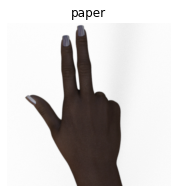

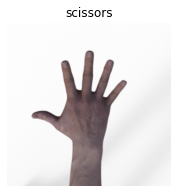

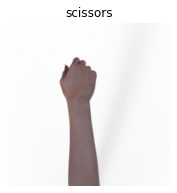

In [ ]:
#Problem images:
#/content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors9.png
#/content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper3.png
#/content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock5.png

path = '/content/rock-paper-scissors/Rock-Paper-Scissors/validation/scissors9.png'
imagedir = path
img = open_image(imagedir)
group, data, prob = Aug_learner.predict(img)
img.show(y= Aug_learner.predict(img)[0])
print("prediction for " + imagedir)
print("Class = {group}, Index = {data}, Probability = {prob}".format(group = group, data = data, prob = prob))

path = '/content/rock-paper-scissors/Rock-Paper-Scissors/validation/paper3.png'
imagedir = path
img = open_image(imagedir)
group, data, prob = Aug_learner.predict(img)
img.show(y= Aug_learner.predict(img)[0])
print("prediction for " + imagedir)
print("Class = {group}, Index = {data}, Probability = {prob}".format(group = group, data = data, prob = prob))

path = '/content/rock-paper-scissors/Rock-Paper-Scissors/validation/rock5.png'
imagedir = path
img = open_image(imagedir)
group, data, prob = Aug_learner.predict(img)
img.show(y= Aug_learner.predict(img)[0])
print("prediction for " + imagedir)
print("Class = {group}, Index = {data}, Probability = {prob}".format(group = group, data = data, prob = prob))

Out of the 33 validation images, 3 were incorrectly guessed. From the shape of the hands in the given images, it can be seen how the first and second image might be confused with other hand gestures.
Accuracy of validation = (Correct guesses / Total guesses) * 100
This results in an accuracy of 90.91% rounded to 2DP

Model can be exported as a .pkl file to be implemented into software or run locally.